# Import Libraries

In [1]:
# General libraries
import os
from datetime import datetime
import pandas as pd
import numpy as np
import pylab as pl
#from pylab import rcParams


# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
import seaborn as sns
sns.set_style('whitegrid')
#rcParams['figure.figsize'] = 12, 8

# preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.preprocessing import OneHotEncoder

In [2]:
path = os.getcwd()
path

'C:\\Users\\siriphan\\Projects\\9_Algoaddict\\8_Avocado'

# Read Data

In [3]:
avo = pd.read_csv(path + '/avocado.csv')
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# General Checking

In [4]:
display(avo.head(5))
print("\n", avo.shape)
print(avo.info())
print(avo.describe())

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany



 (18249, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900

In [5]:
avo.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Tidy up a little!

In [6]:
avo.drop('Unnamed: 0', axis = 1, inplace = True)
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Descriptive Analysis

In [7]:
avo.info()
avo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Dealing with strings

In [8]:
avo.select_dtypes('object').columns

Index(['Date', 'type', 'region'], dtype='object')

conventional    9126
organic         9123
Name: type, dtype: int64


C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


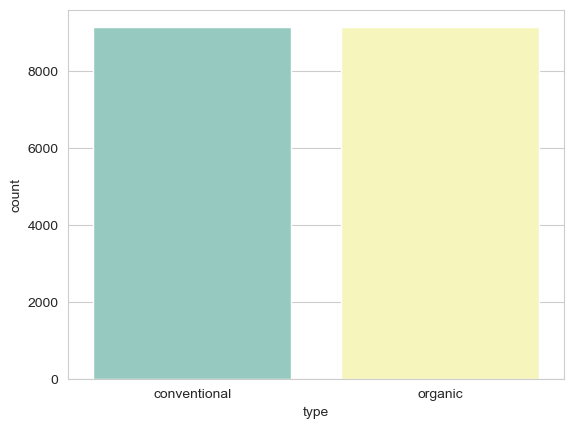

In [9]:
# type is perfectly balanced and could be useful for ML in the future

print(avo['type'].value_counts())
sns.countplot('type', data=avo, palette='Set3')

plt.show()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


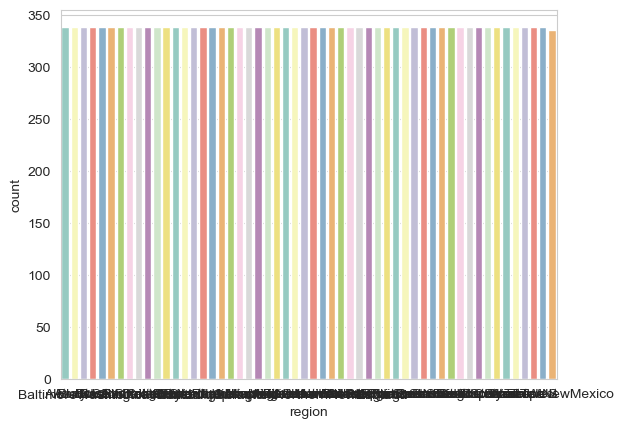

In [10]:
# Let look at the region

print(avo['region'].value_counts())
print('\n', 'There are:', len(avo['region'].unique()), 'unique values in the feature')
sns.countplot('region', data=avo, palette='Set3')
plt.show()


The Features have 54 unique values which are perfectly distributed through the dataset.
For machine learning purposes, the data could be transformed with the OneHotEncoder formula to have a larger variaty of features to build a machine learning model
The data can be used as well to analyze the price behaviour and quantity sold in each regi

## Dealling with numbers

In [11]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [12]:
avo[avo.year == 2018]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8478,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2018,Albany
8479,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2018,Albany
8480,2018-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2018,Albany
8481,2018-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,2018,Albany
8482,2018-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,2018,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


In [13]:
numbers = list(avo.select_dtypes(['float64', 'int64']).keys())
numbers

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

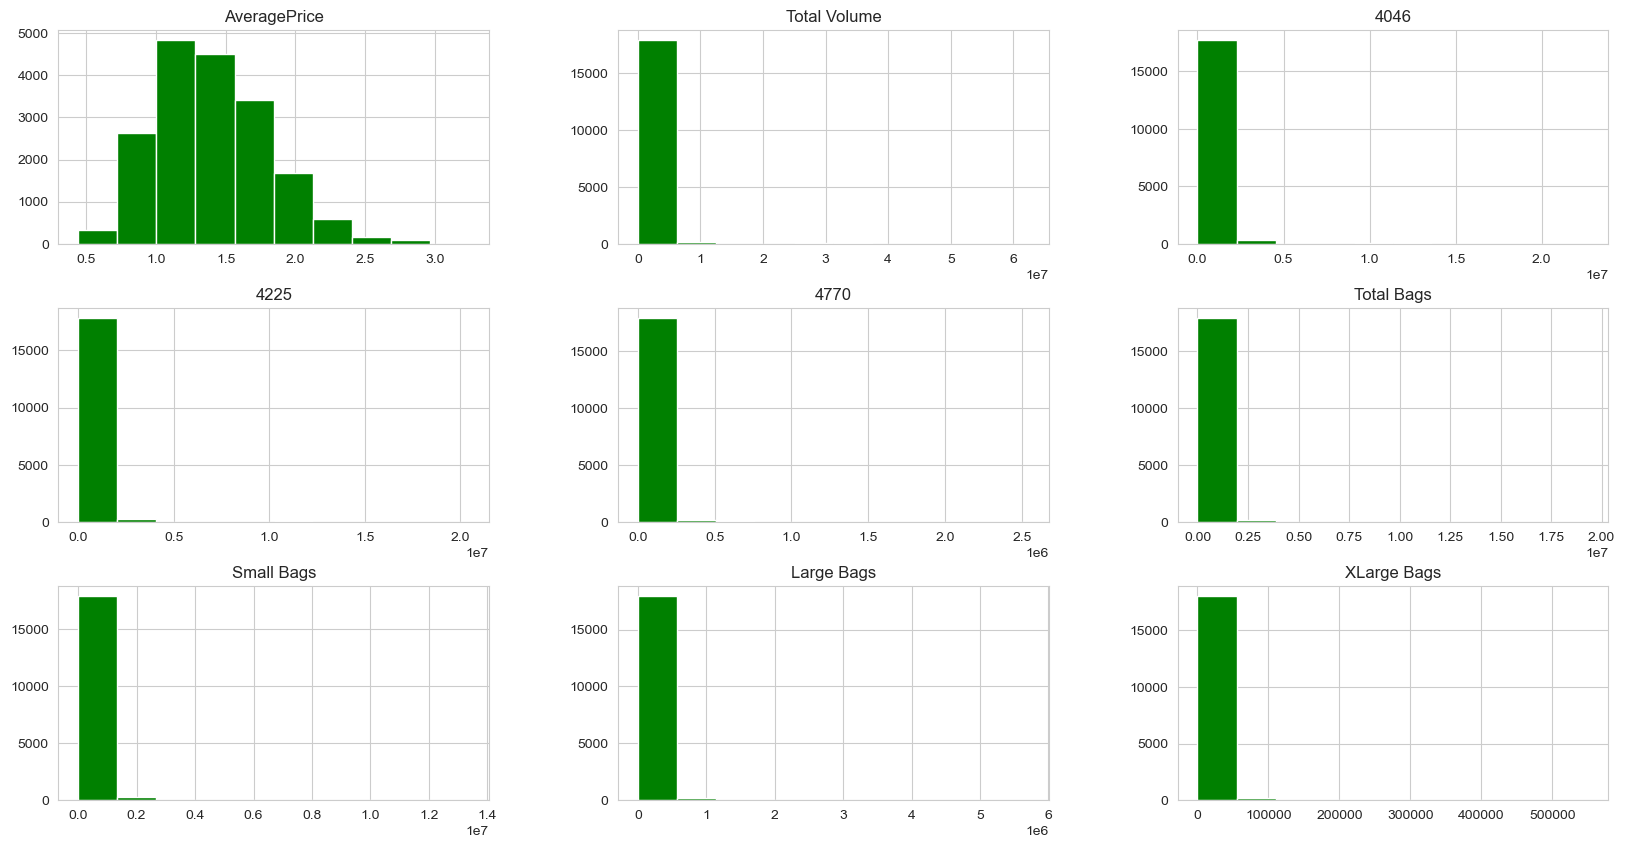

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [14]:
# removing years
numbers.remove('year')

avo[numbers].hist(figsize=(20,10), color='green', edgecolor='white')
plt.show()
display(avo[numbers].describe())

In [15]:
avo[avo['year'] == 2018]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8478,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2018,Albany
8479,2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,2018,Albany
8480,2018-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,2018,Albany
8481,2018-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,2018,Albany
8482,2018-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,2018,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


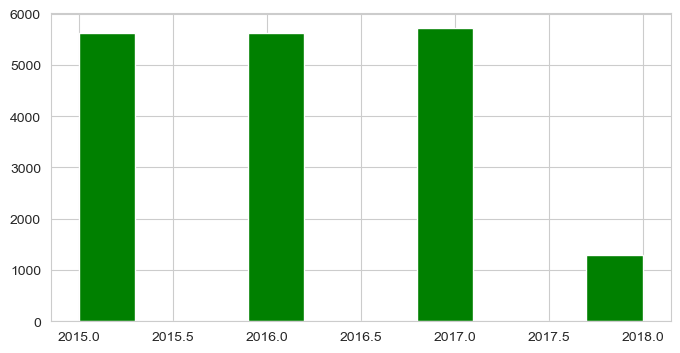

In [16]:
avo['year'].hist(figsize=(8,4), color='green', edgecolor='white')
plt.show()

C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


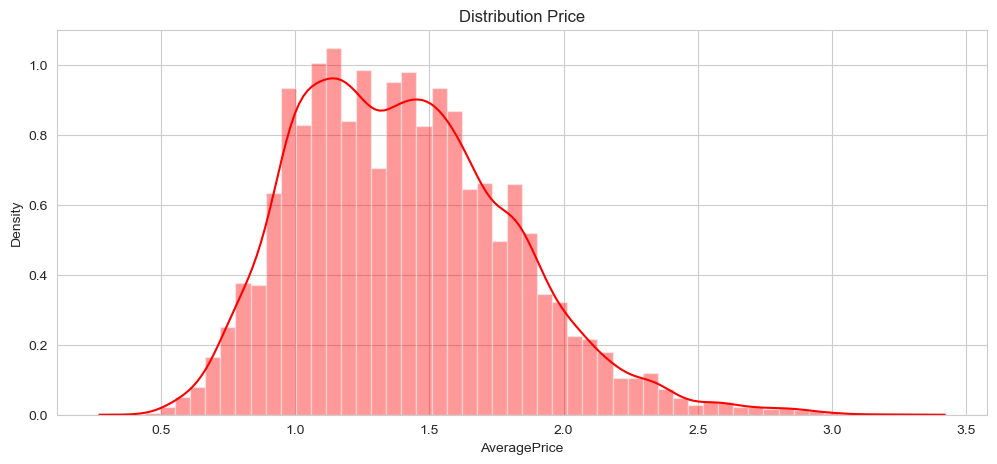

In [17]:
pl.figure(figsize=(12,5))
pl.title("Distribution Price")
ax = sns.distplot(avo["AveragePrice"], color = 'r')

## Dealing with outliers

In [18]:
avo_o = avo[avo['Total Volume']<50000]
avo_o

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
35,2015-04-26,1.22,49585.46,875.65,35841.75,89.62,12778.44,12076.83,701.61,0.00,conventional,2015,Albany
36,2015-04-19,1.19,49064.73,774.15,33941.51,47.15,14301.92,13602.97,698.95,0.00,conventional,2015,Albany
37,2015-04-12,1.13,48364.29,864.27,30374.15,21.50,17104.37,16438.49,665.88,0.00,conventional,2015,Albany
38,2015-04-05,1.16,47362.13,961.77,35577.66,93.76,10728.94,9869.16,755.61,104.17,conventional,2015,Albany
40,2015-03-22,1.12,46346.85,2141.83,34313.56,141.80,9749.66,9252.60,497.06,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


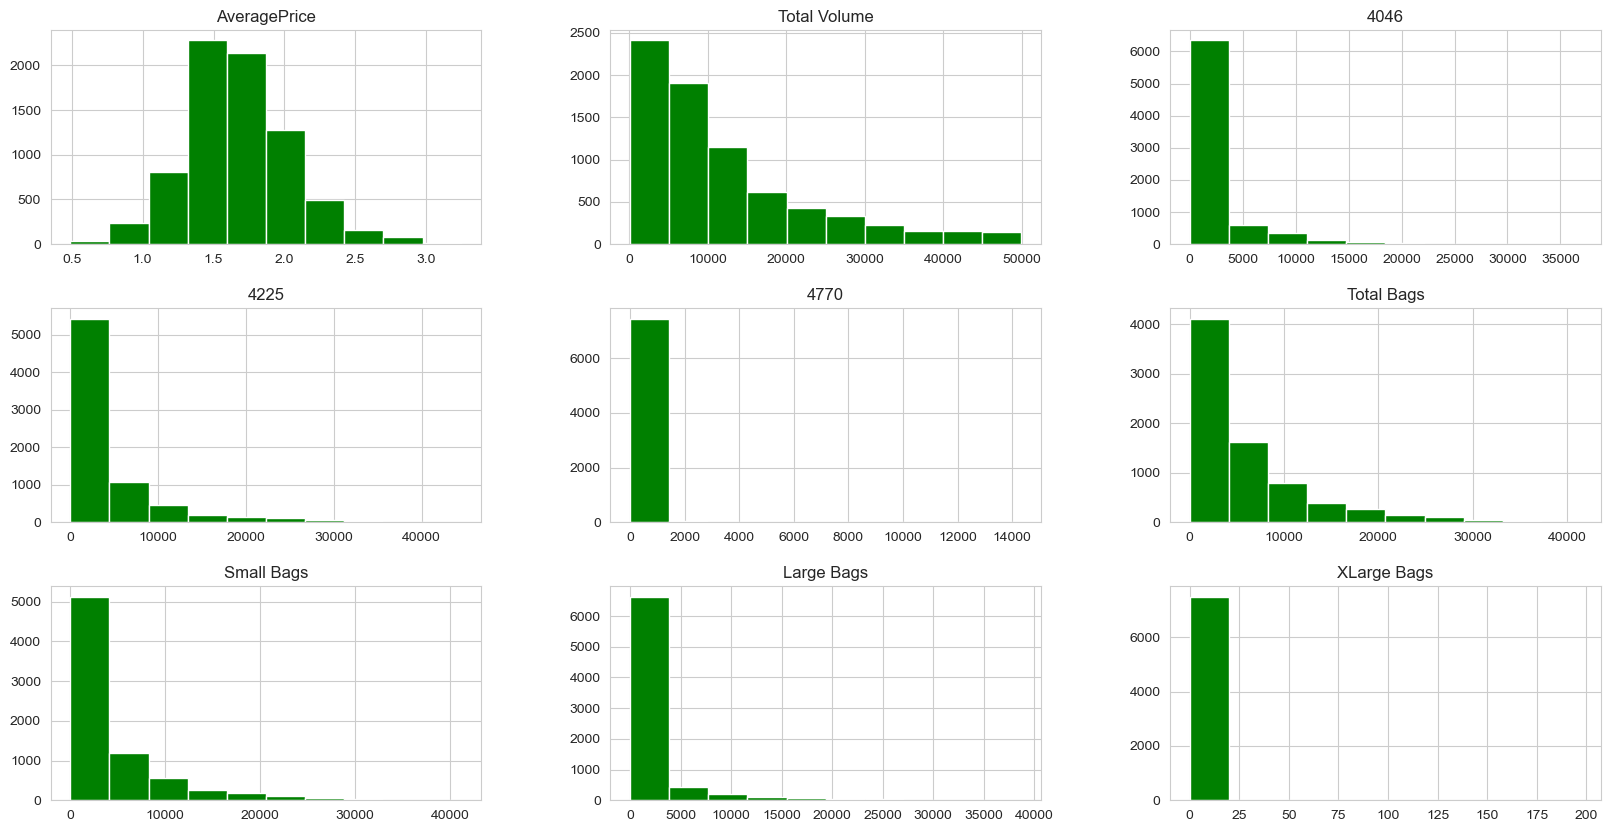

In [19]:
avo_o[numbers].hist(figsize=(20,10), color='green', edgecolor='white')

plt.show()

<AxesSubplot:>

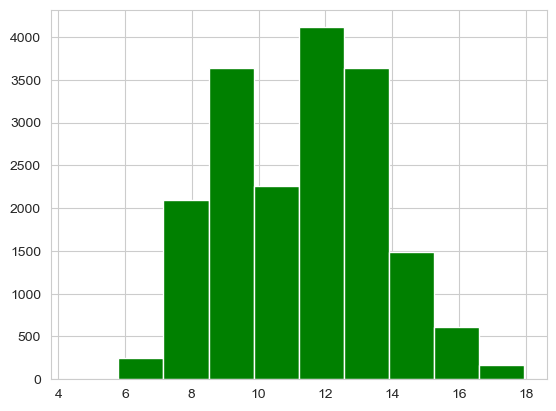

In [20]:
# Taking logarithm to make data more normal distribution, which is useful for ML models such as regression model.



TotalLog = np.log(avo['Total Volume'] + 1)
TotalLog.hist(color='green', edgecolor='white')

### Dealing with dates

In [21]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
avo['Date'] = avo['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

avo['month'] = avo['Date'].dt.month
avo['day'] = avo['Date'].dt.day

avo['day of week'] = avo['Date'].dt.dayofweek
dates = ['year', 'month', 'day', 'day of week']
avo[dates]

,year,month,day,day of week
0,2015,12,27,6
1,2015,12,20,6
2,2015,12,13,6
3,2015,12,6,6
4,2015,11,29,6
...,...,...,...,...
18244,2018,2,4,6
18245,2018,1,28,6
18246,2018,1,21,6
18247,2018,1,14,6


C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siriphan\Anac

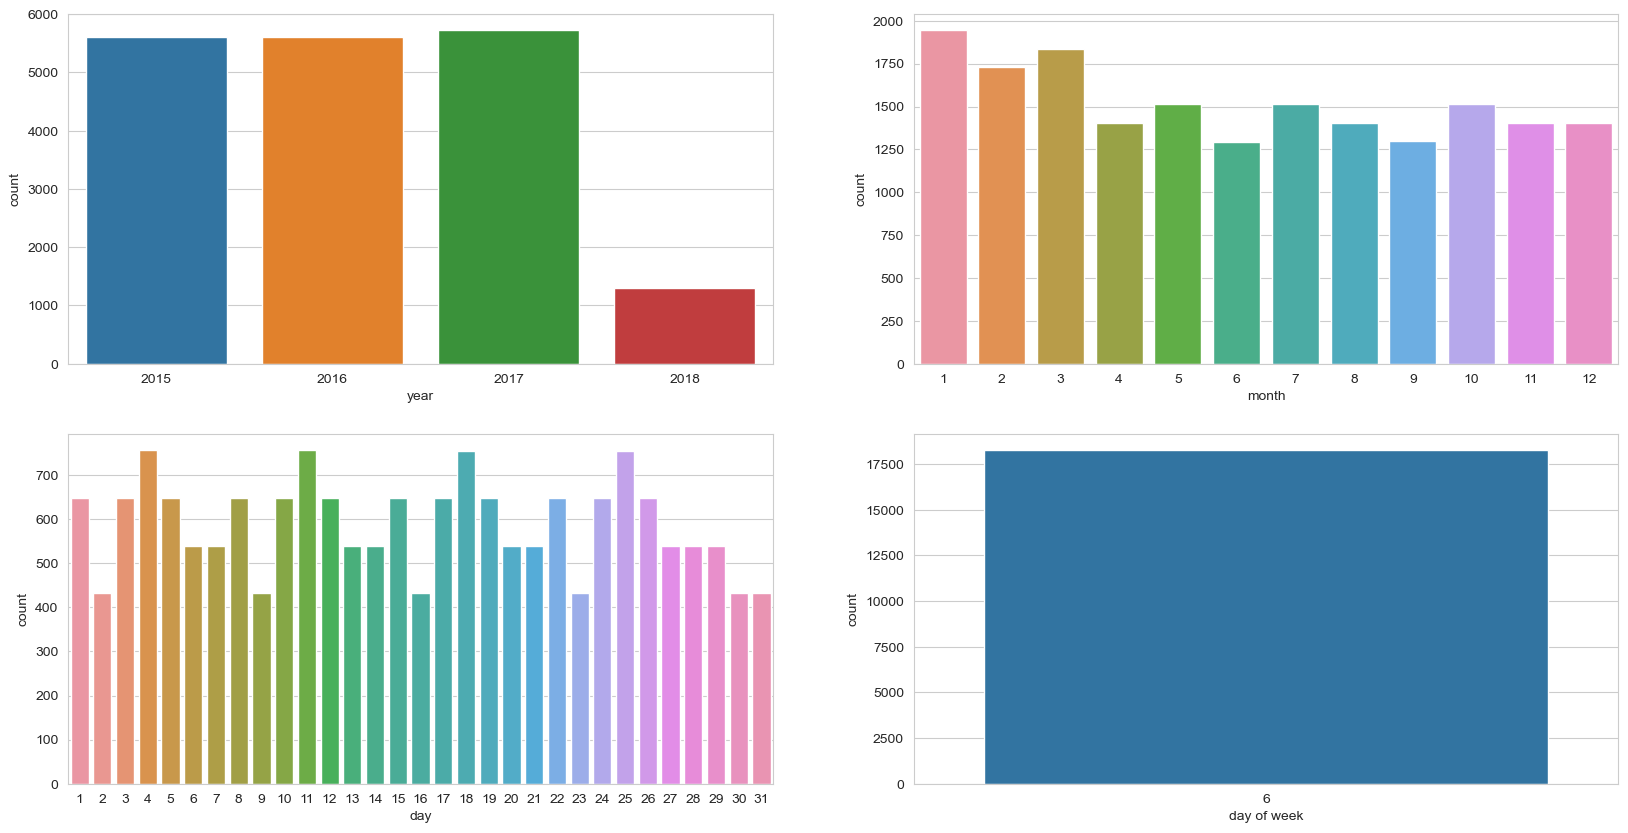

In [23]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.countplot('year', data=avo, ax=ax[0,0],)
sns.countplot('month', data=avo, ax=ax[0,1])
sns.countplot('day', data=avo, ax=ax[1,0])
sns.countplot('day of week', data=avo, ax=ax[1,1])

plt.show()

In [24]:
# day of week is redundant and can be eliminated

avo.drop('day of week', axis=1, inplace=True)

In [25]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


<AxesSubplot:xlabel='month'>

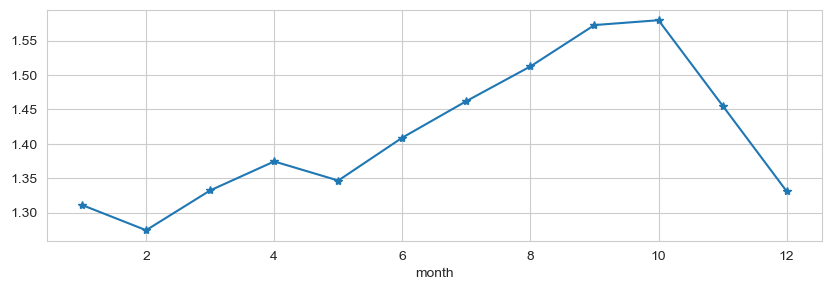

In [26]:
avo.groupby('month')['AveragePrice'].mean().plot(figsize=(10,3), marker = '*')

In [27]:
avo_cut = avo[avo.year != 2018]

In [28]:
avo_cut

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17596,2017-01-29,1.30,17839.37,1486.34,4498.48,26.12,11828.43,11821.76,6.67,0.0,organic,2017,WestTexNewMexico,1,29
17597,2017-01-22,1.21,16430.64,1413.93,2820.53,20.25,12175.93,12073.07,102.86,0.0,organic,2017,WestTexNewMexico,1,22
17598,2017-01-15,1.19,17014.23,1203.87,2904.22,23.07,12883.07,12476.57,406.50,0.0,organic,2017,WestTexNewMexico,1,15
17599,2017-01-08,1.18,14375.39,1327.98,2617.20,5.75,10424.46,10283.85,140.61,0.0,organic,2017,WestTexNewMexico,1,8


C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


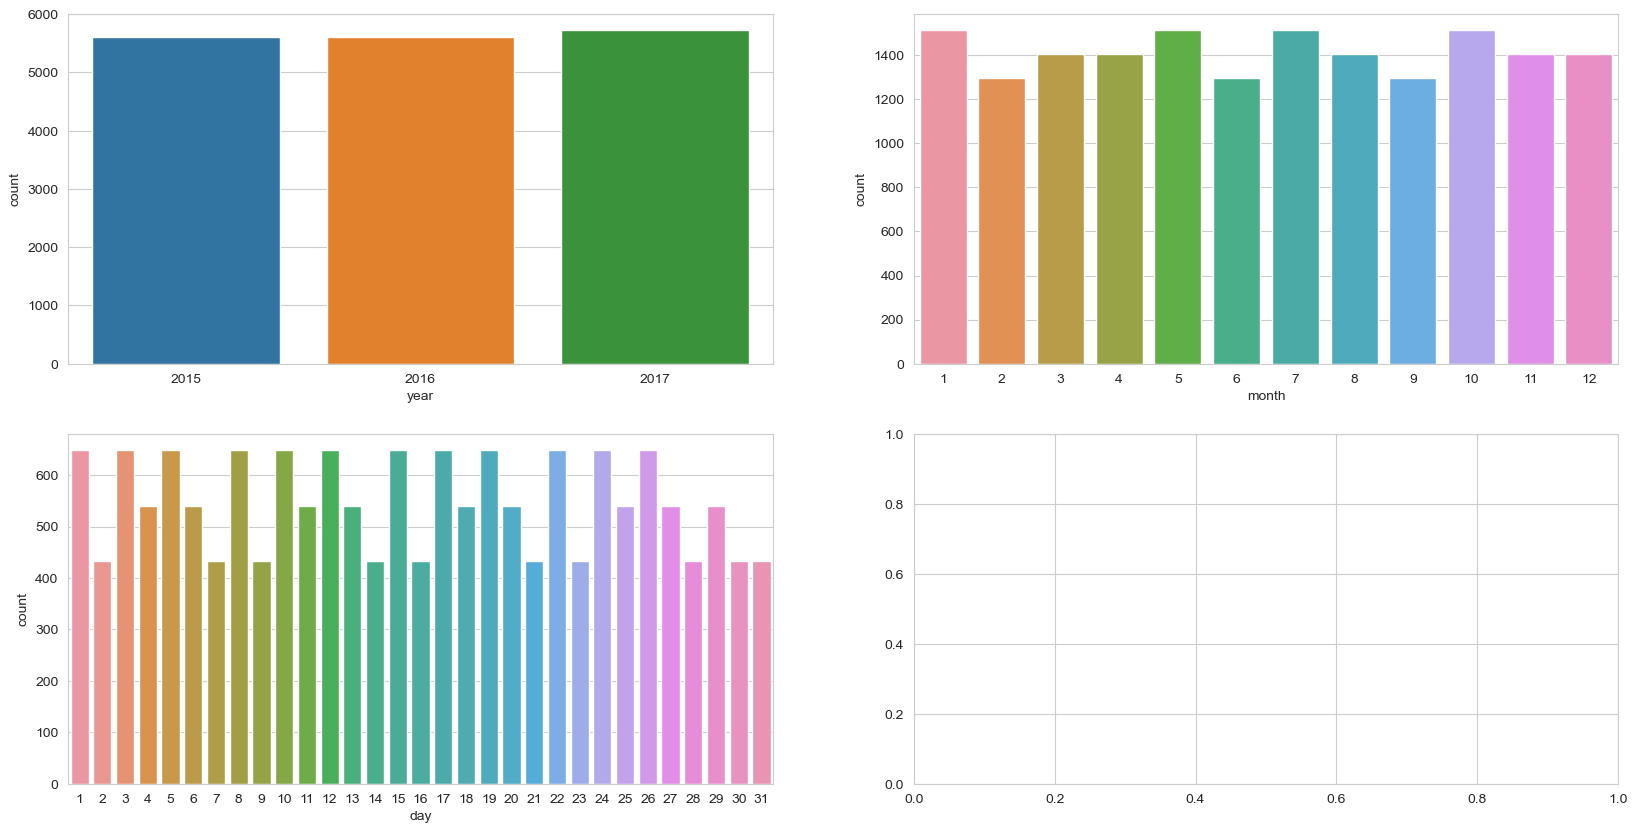

In [29]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.countplot('year', data=avo_cut, ax=ax[0,0],)
sns.countplot('month', data=avo_cut, ax=ax[0,1])
sns.countplot('day', data=avo_cut, ax=ax[1,0])

plt.show()

# EDA

## Correlation

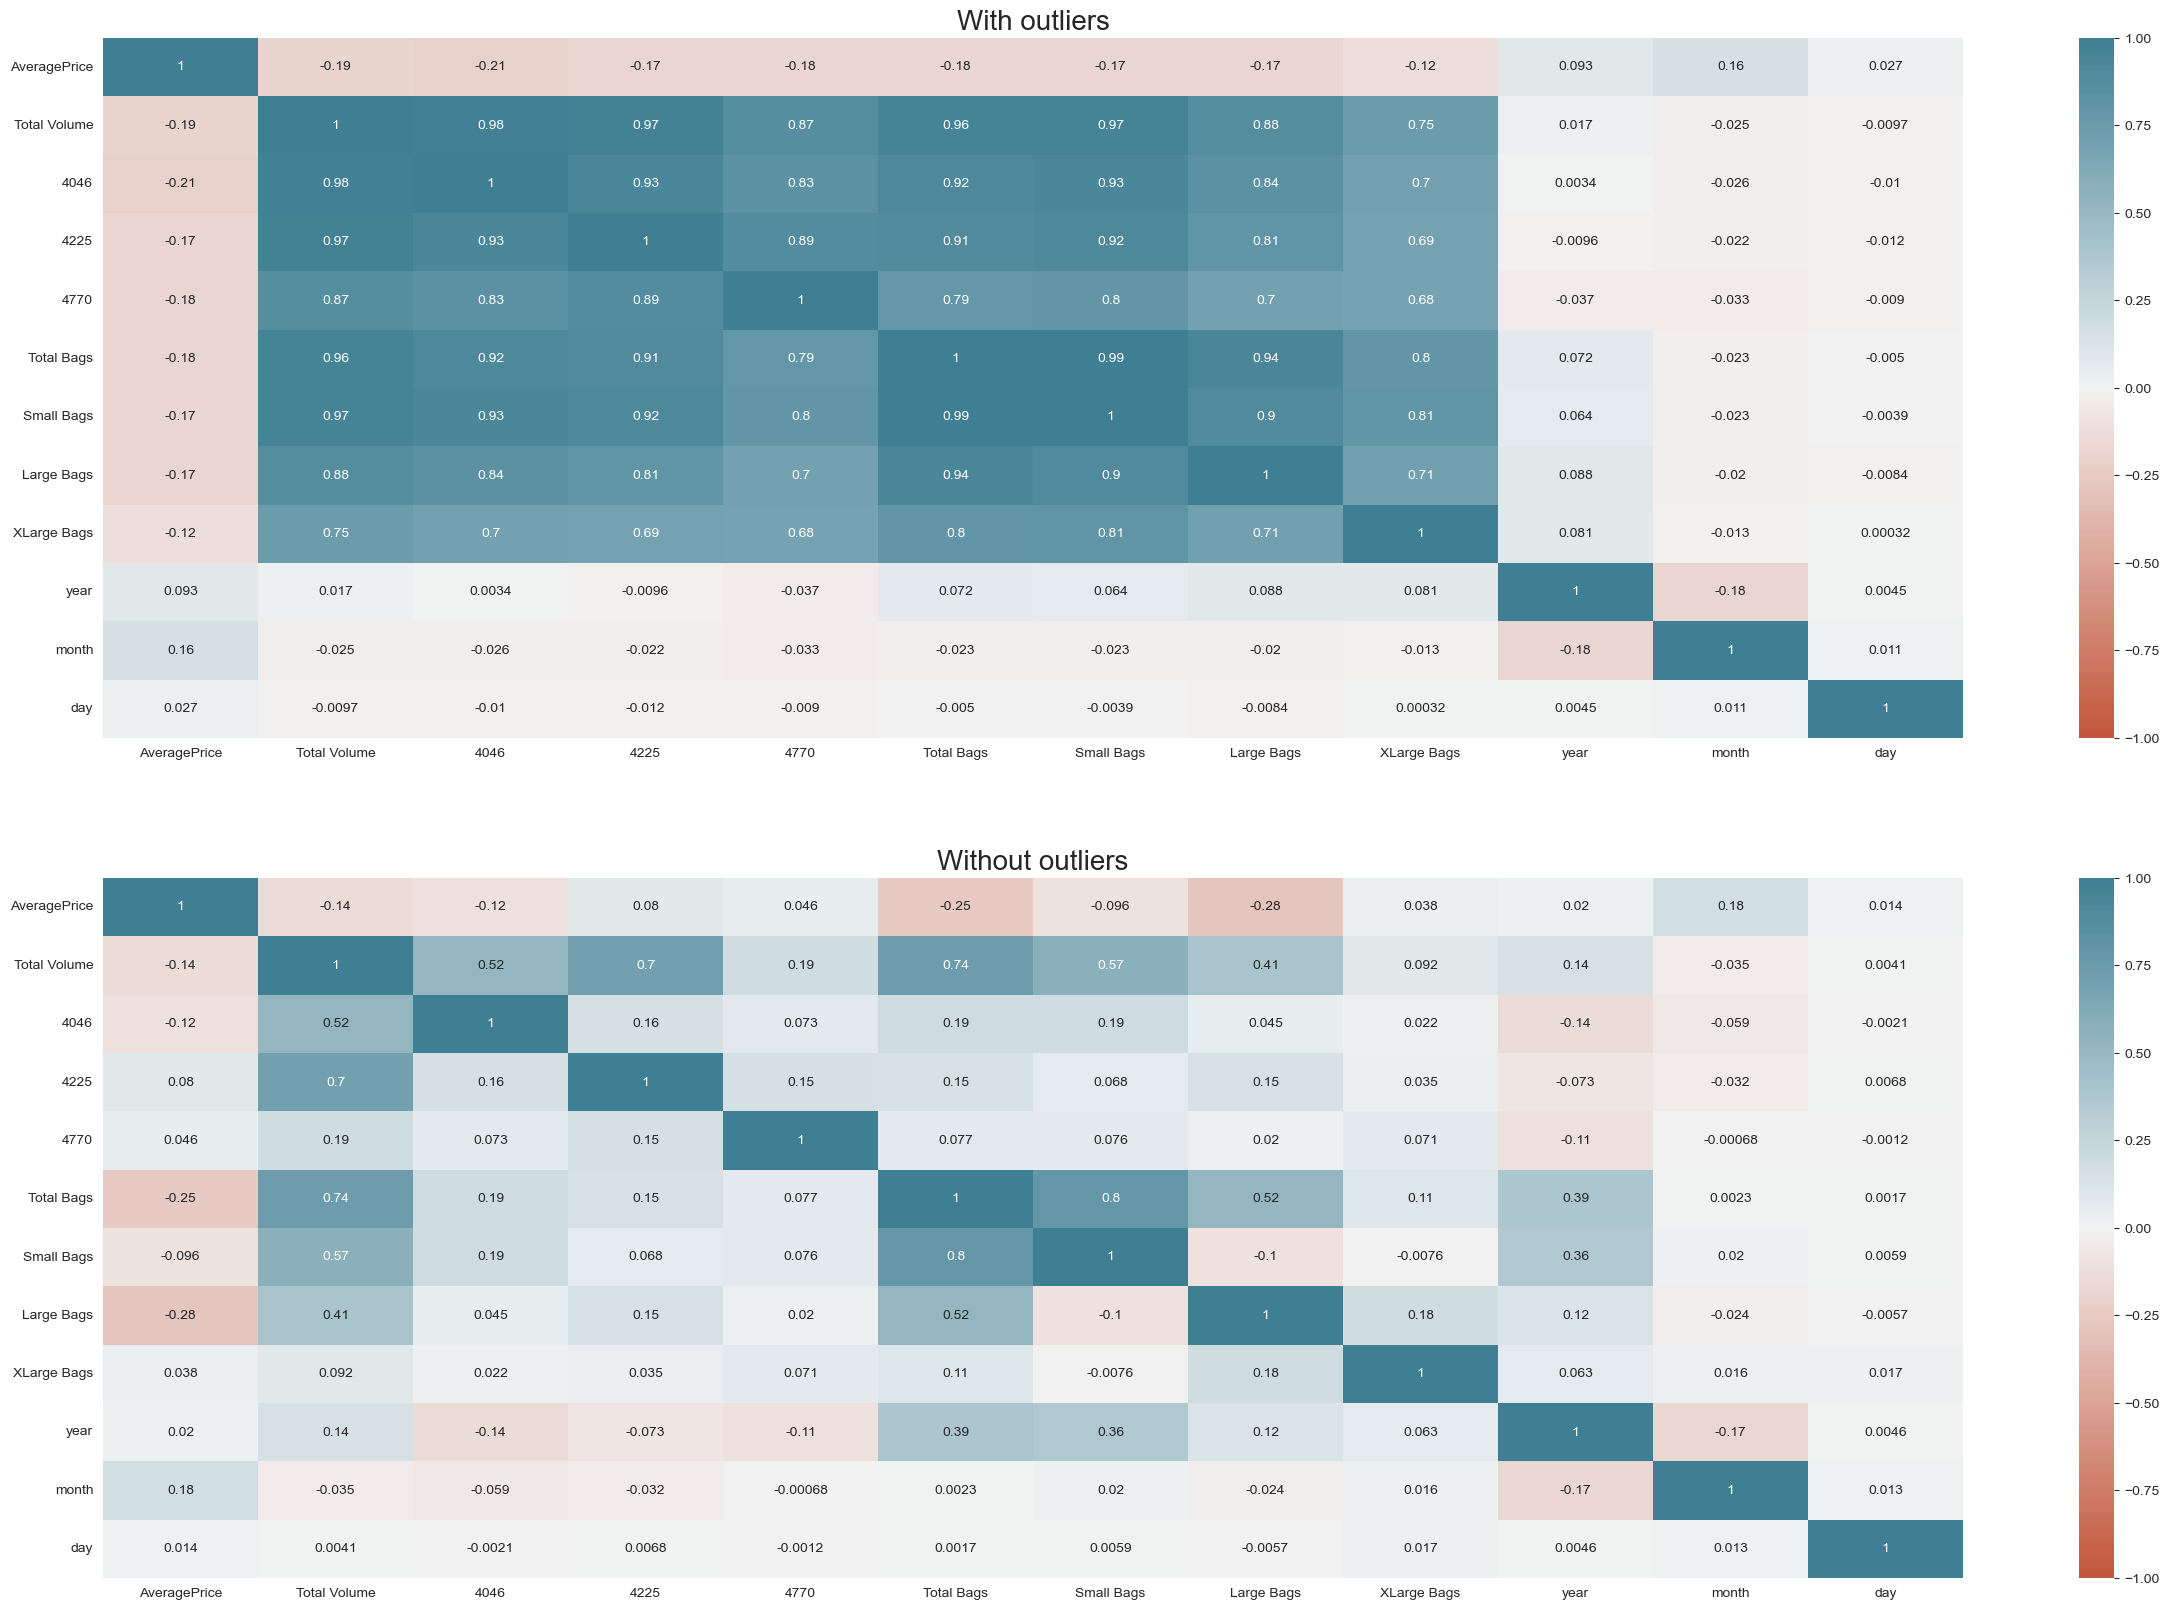

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(30,20))
avo_o = avo[avo['Total Volume']<50000]
sns.heatmap(avo.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax[0])
ax[0].set_title('With outliers', fontsize=20)
sns.heatmap(avo_o.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, ax=ax[1])
ax[1].set_title('Without outliers', fontsize=20)
plt.show()

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

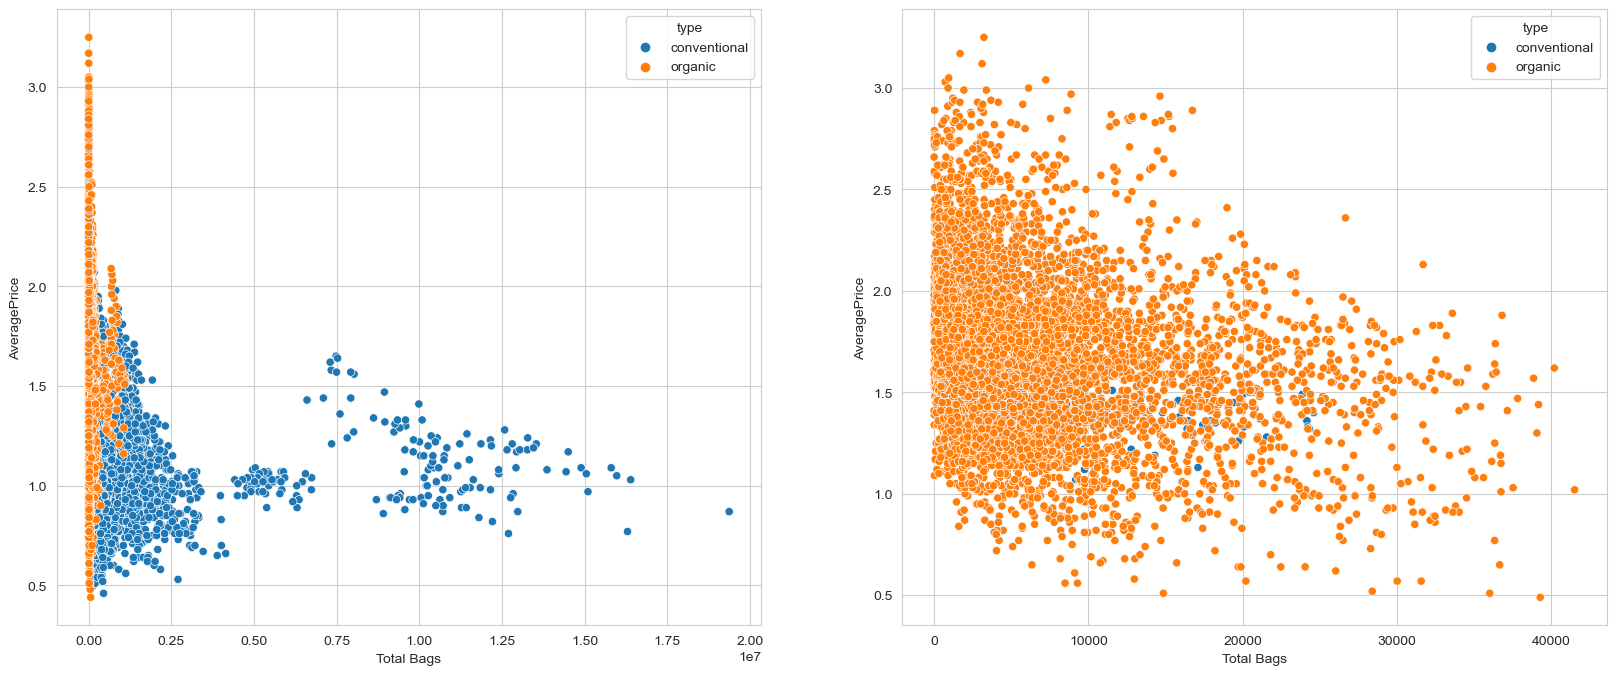

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.scatterplot(x='Total Bags', y='AveragePrice', data=avo, hue='type', ax=ax1)
sns.scatterplot(x='Total Bags', y='AveragePrice', data=avo_o, hue='type', ax=ax2)

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

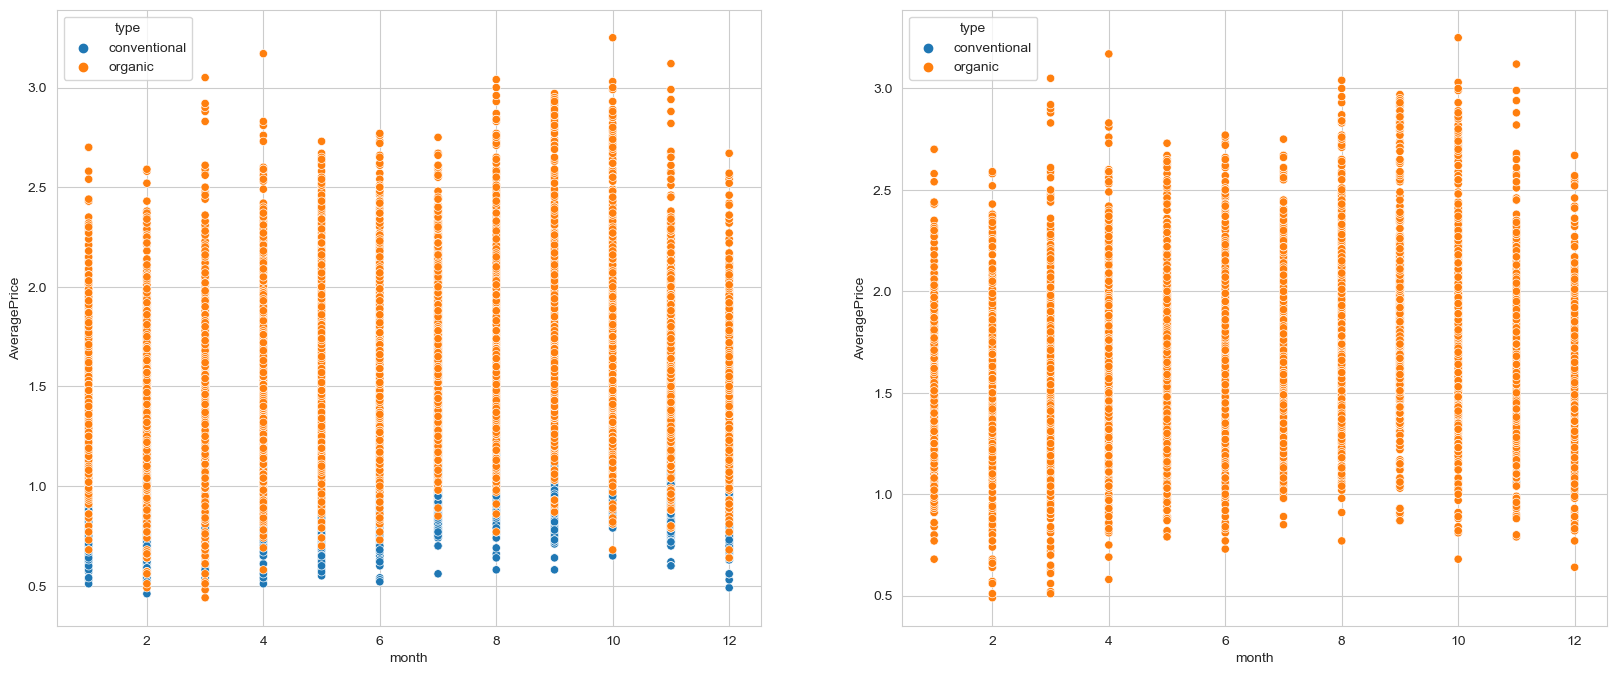

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))

sns.scatterplot(x='month', y='AveragePrice', data=avo, hue='type', ax=ax1)
sns.scatterplot(x='month', y='AveragePrice', data=avo_o, hue='type', ax=ax2)

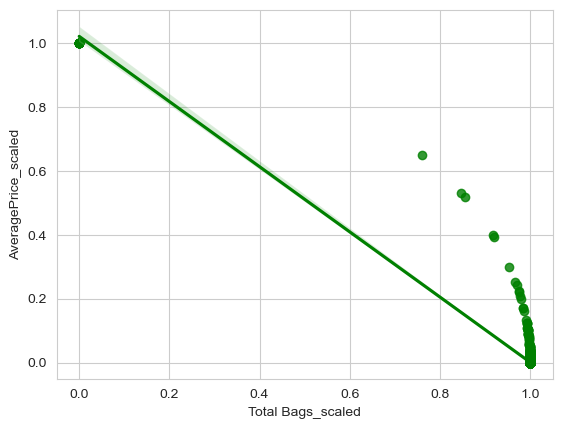

In [33]:
scaler = Normalizer()
scaler.fit(avo[['Total Bags', 'AveragePrice']].values)
avo['Total Bags_scaled'] = scaler.transform(avo[['Total Bags', 'AveragePrice']].values)[:,0]
avo['AveragePrice_scaled'] = scaler.transform(avo[['Total Bags', 'AveragePrice']].values)[:,1]
sns.regplot(x='Total Bags_scaled', y='AveragePrice_scaled', data=avo, color='g')
plt.show()

## Dates

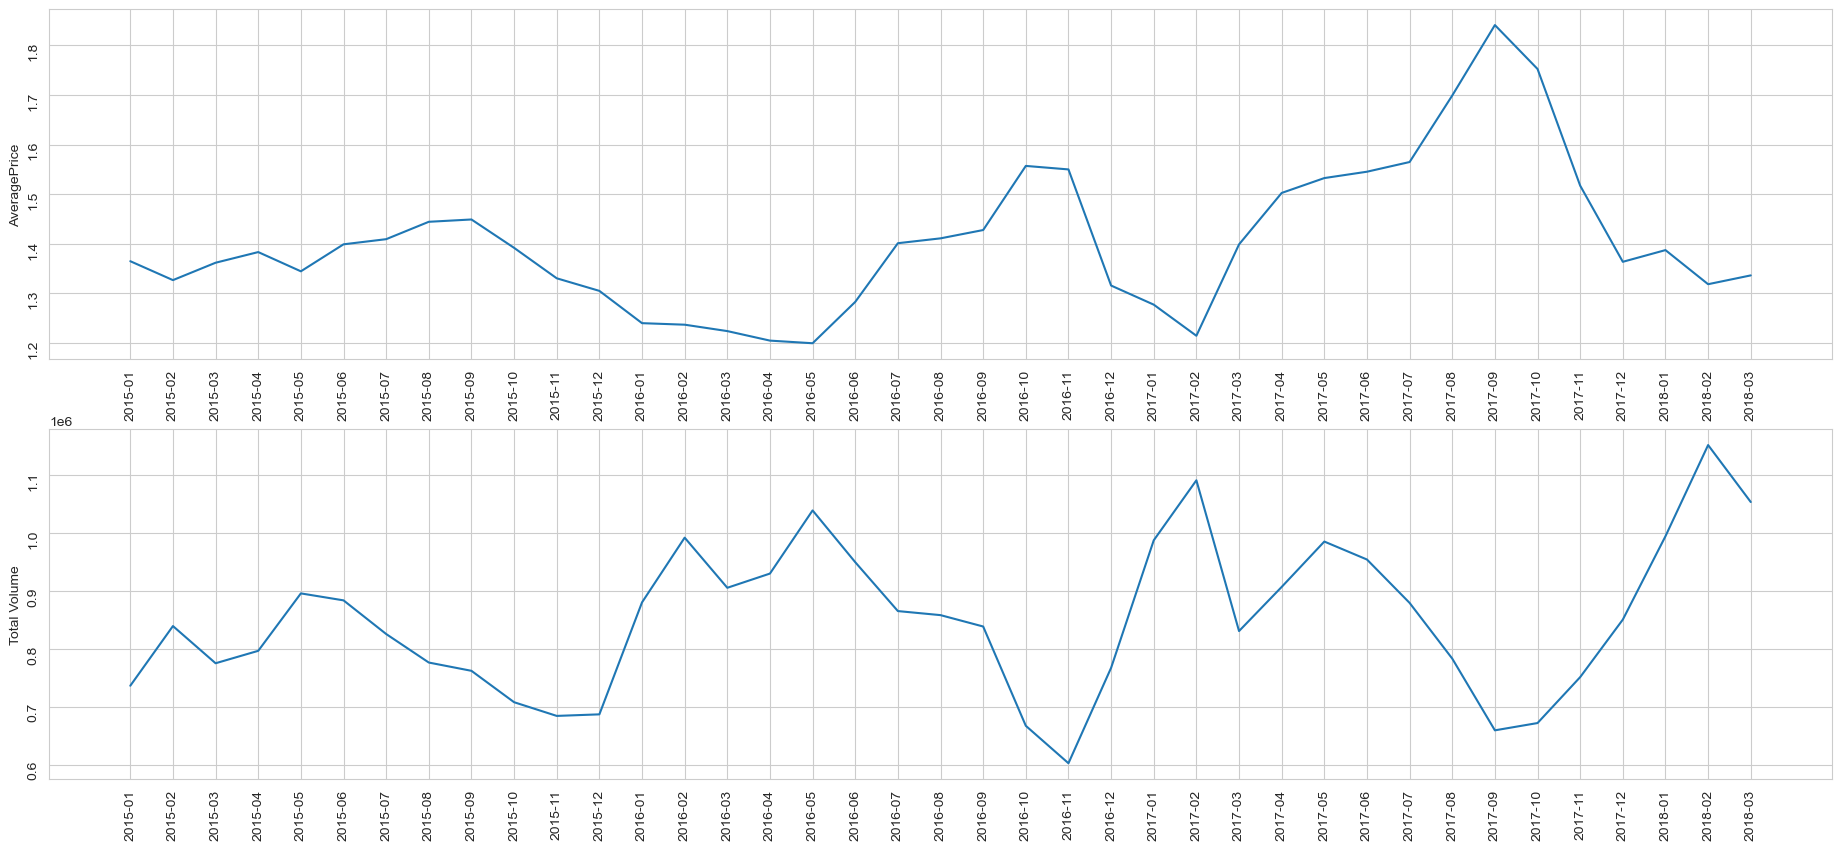

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(23,10))

avo['year_month'] = avo['Date'].dt.to_period('M')
grouped = avo.groupby('year_month')[['AveragePrice', 'Total Volume']].mean()

ax[0].plot(grouped.index.astype(str), grouped['AveragePrice'])
ax[0].tick_params(labelrotation=90)
ax[0].set_ylabel('AveragePrice')

ax[1].plot(grouped.index.astype(str), grouped['Total Volume'])
ax[1].tick_params(labelrotation=90)
ax[1].set_ylabel('Total Volume')

plt.show()

# Question 1: Which type of avocado sells better?

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

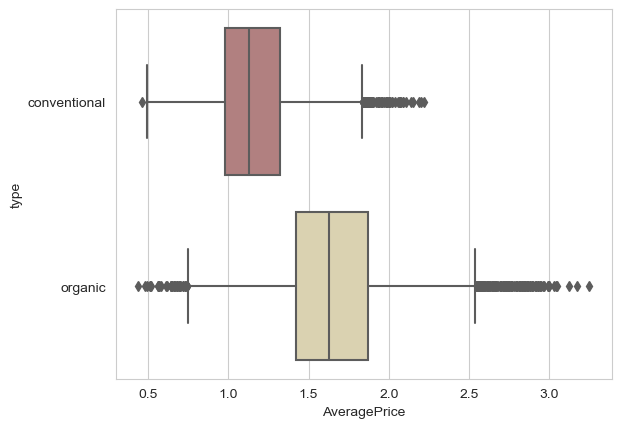

In [35]:
sns.boxplot(y="type", x="AveragePrice", data=avo, palette = 'pink')

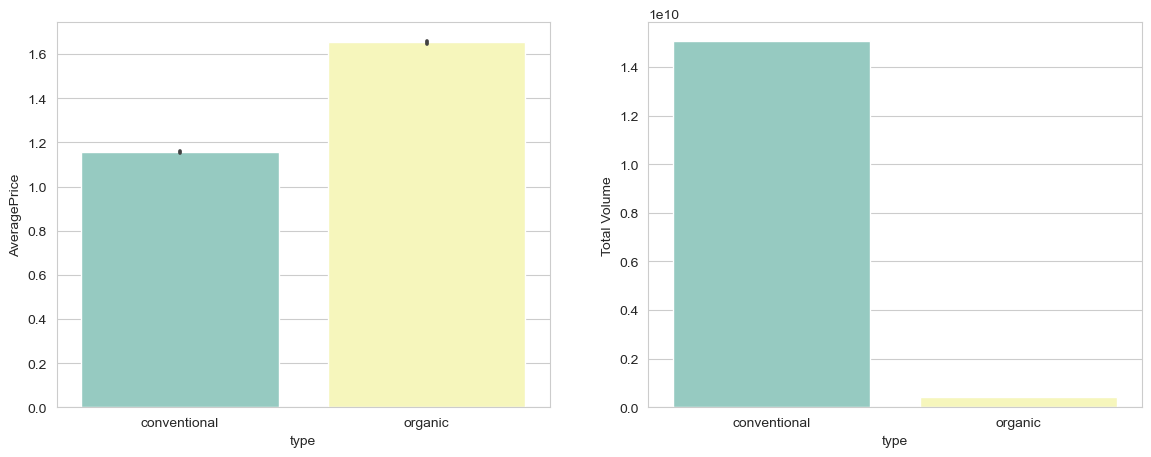

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.barplot(x='type', y='AveragePrice', data=avo, palette='Set3', ax=ax[0])
sns.barplot(x='type', y='Total Volume', data=avo, palette='Set3', ax=ax[1], estimator=sum, ci=None)
plt.show()
display(avo.groupby('type')['AveragePrice'].mean())
display(avo.groupby('type')['Total Volume'].sum())


# Are organic avocadoes gaining popularity?

In [37]:
group = avo.groupby(['type', 'year_month'])['Total Volume'].sum()

organic = group['organic']
organic = pd.DataFrame(organic)
organic['Total Volume % change'] = np.round(organic['Total Volume'].pct_change() * 100, 2)

conventional = group['conventional']
conventional = pd.DataFrame(conventional)
conventional['Total Volume % change'] = np.round(conventional['Total Volume'].pct_change() * 100, 2)

conventional['Total Volume % change'].mean()
print("The sum of percentage change of Organic is: {}".format(np.around(organic['Total Volume % change'].sum(), 2)))
print("The sum of percentage change of Conventional is: {}".format(np.around(conventional['Total Volume % change'].sum(), 2)))

The sum of percentage change of Organic is: 200.48
The sum of percentage change of Conventional is: 137.02


# How seasonality works? When can I find more avocados? When can I buy cheaper avocados?

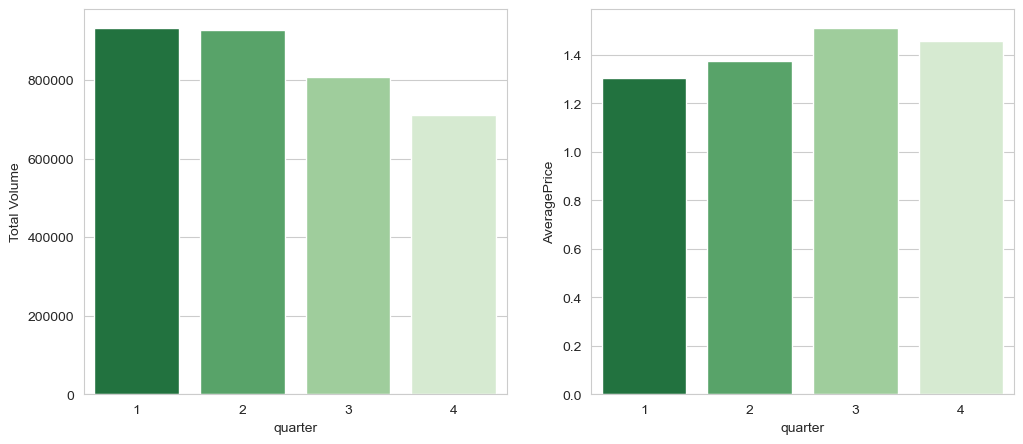

,Total Volume,AveragePrice
quarter,,
1,933371.788252,1.306605
2,928527.872254,1.375033
3,808062.047498,1.512913
4,710750.427752,1.458588


In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

avo['quarter'] = avo['Date'].dt.quarter


sns.barplot(x='quarter', y='Total Volume', data=avo, palette='Greens_r', ci=None, ax=ax[0])
sns.barplot(x='quarter', y='AveragePrice', data=avo, palette='Greens_r', ci=None, ax=ax[1])


plt.show()

quarter = avo.groupby('quarter')[['Total Volume', 'AveragePrice']].mean()
display(quarter)

# price by regions, Where can I find more avocados? where can I buy cheaper avocados?

In [39]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,Total Bags_scaled,AveragePrice_scaled,year_month,quarter
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,1.0,0.000153,2015-12,4
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,1.0,0.000142,2015-12,4
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,1.0,0.000114,2015-12,4
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,1.0,0.000186,2015-12,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,1.0,0.000207,2015-11,4


C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


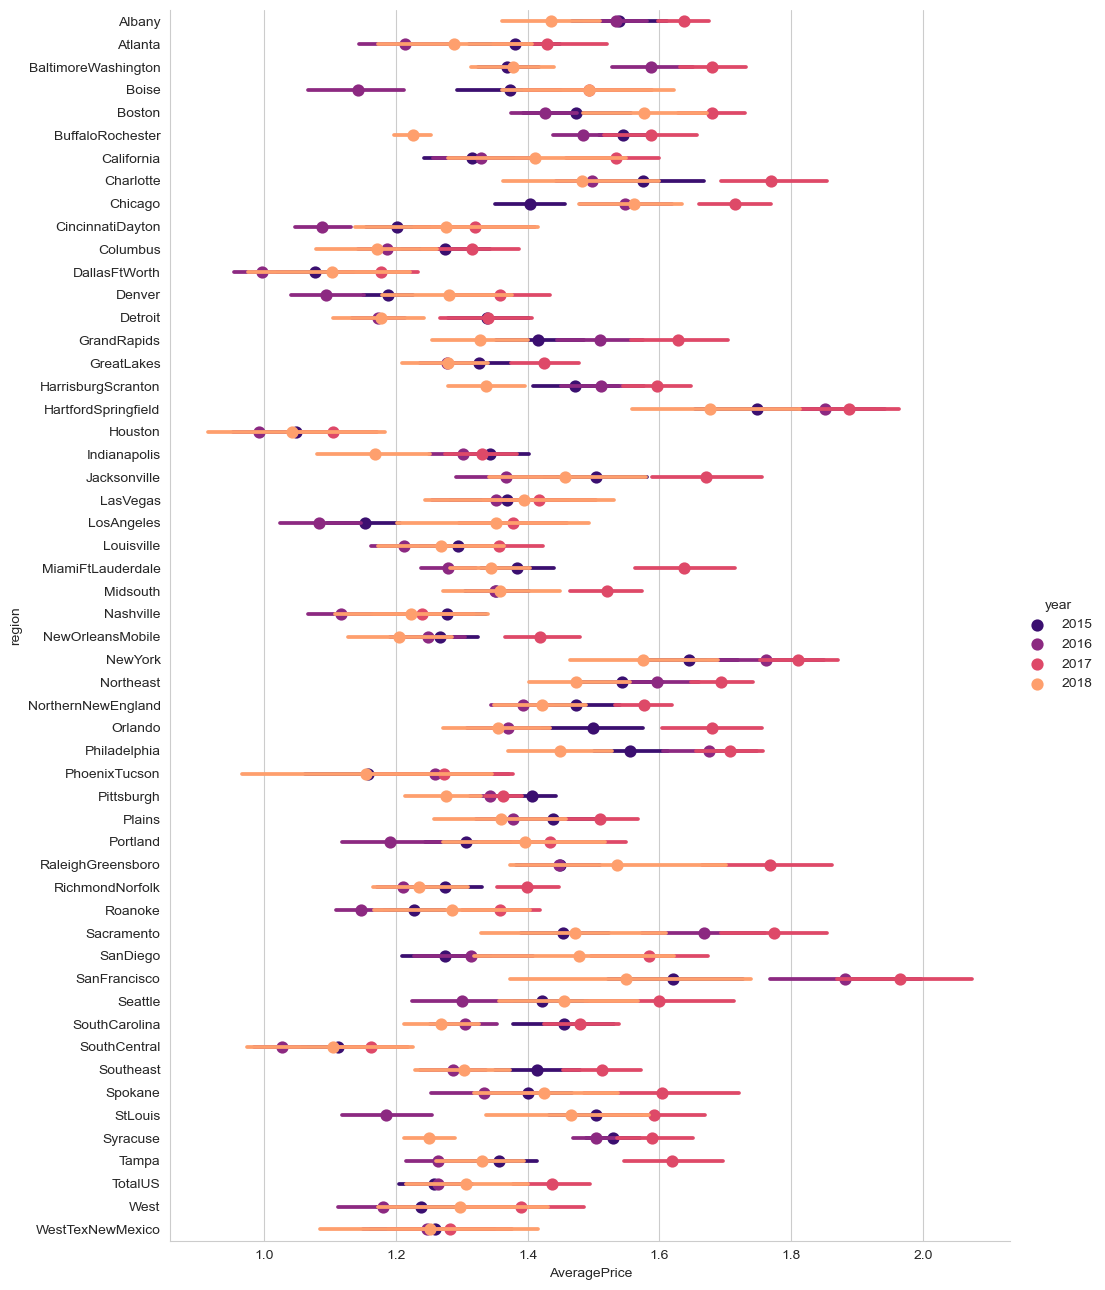

In [40]:
g = sns.factorplot('AveragePrice','region',data=avo,
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


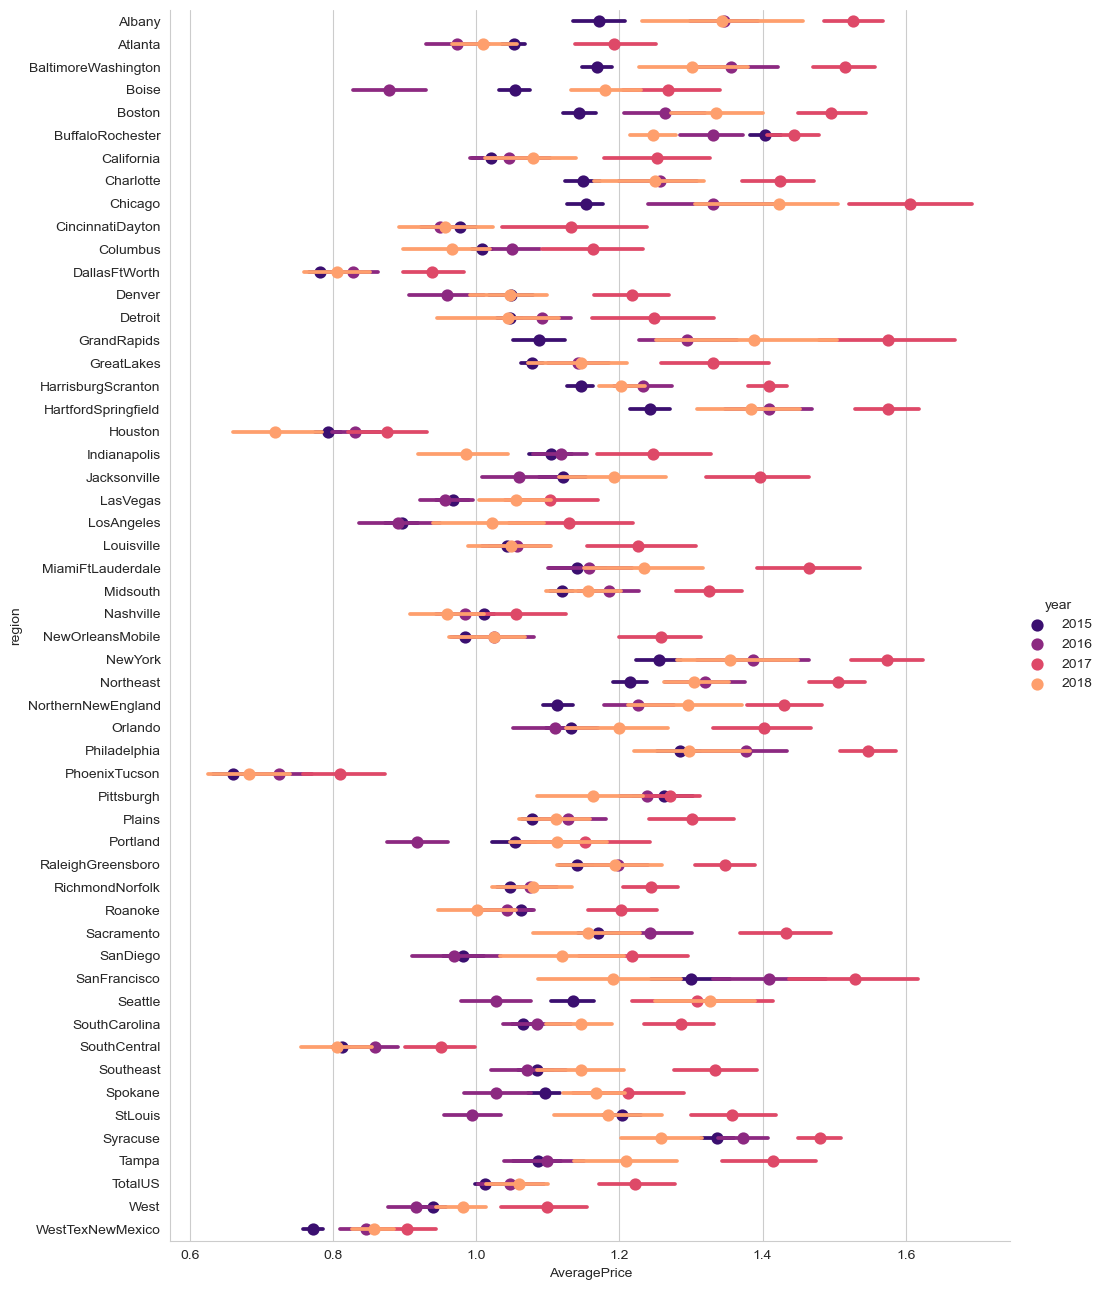

In [41]:
mask = avo['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=avo[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\siriphan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


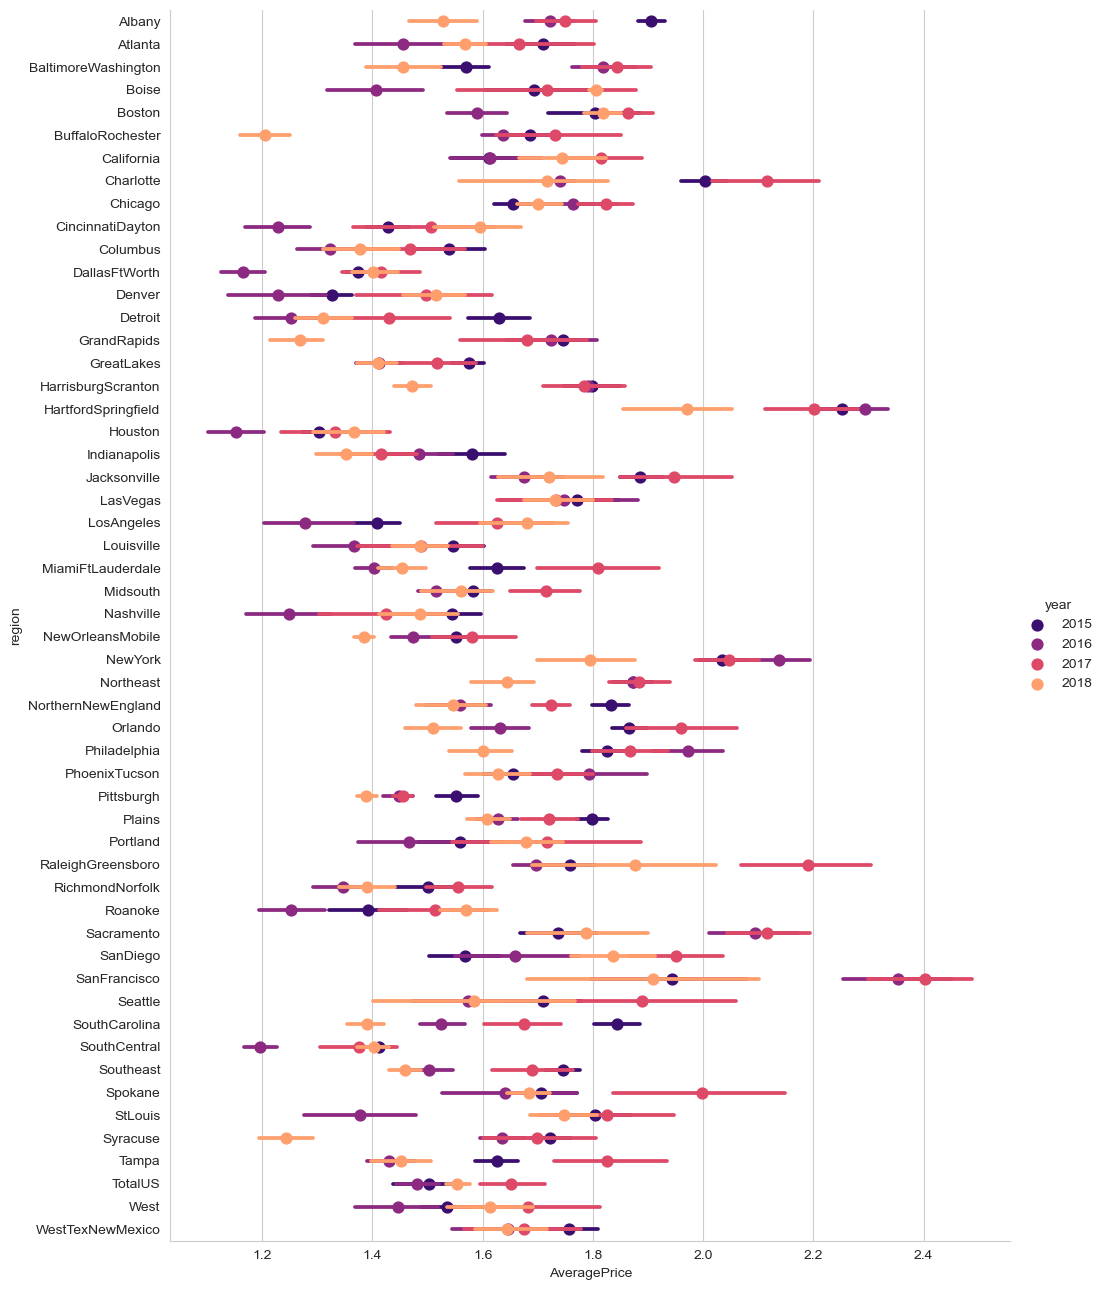

In [42]:
mask = avo['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=avo[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

## Price

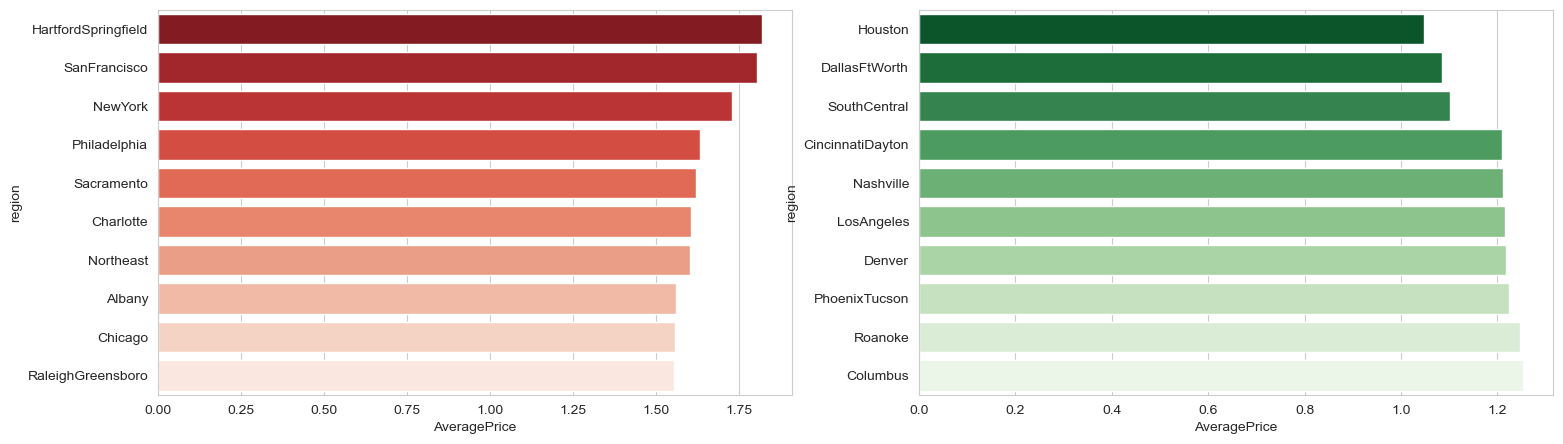

the most expensive avocados can be found in ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia', 'Sacramento'] 
the cheapest avocados can be found in ['Houston', 'DallasFtWorth', 'SouthCentral', 'CincinnatiDayton', 'Nashville'] 


In [43]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

regionP = avo.groupby('region')['AveragePrice'].mean()

expensive = regionP.sort_values(ascending = False).iloc[:10]
cheap = regionP.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = avo, order=expensive.index, ci=None, palette='Reds_r', ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = avo, order=cheap.index, ci=None, palette='Greens_r', ax=ax[1])

plt.show()

cheap = pd.DataFrame(cheap).reset_index()
expensive = pd.DataFrame(expensive).reset_index()

print('the most expensive avocados can be found in {} '.format(list(expensive.iloc[:5,0])))
print('the cheapest avocados can be found in {} '.format(list(cheap.iloc[:5,0])))

## Volume

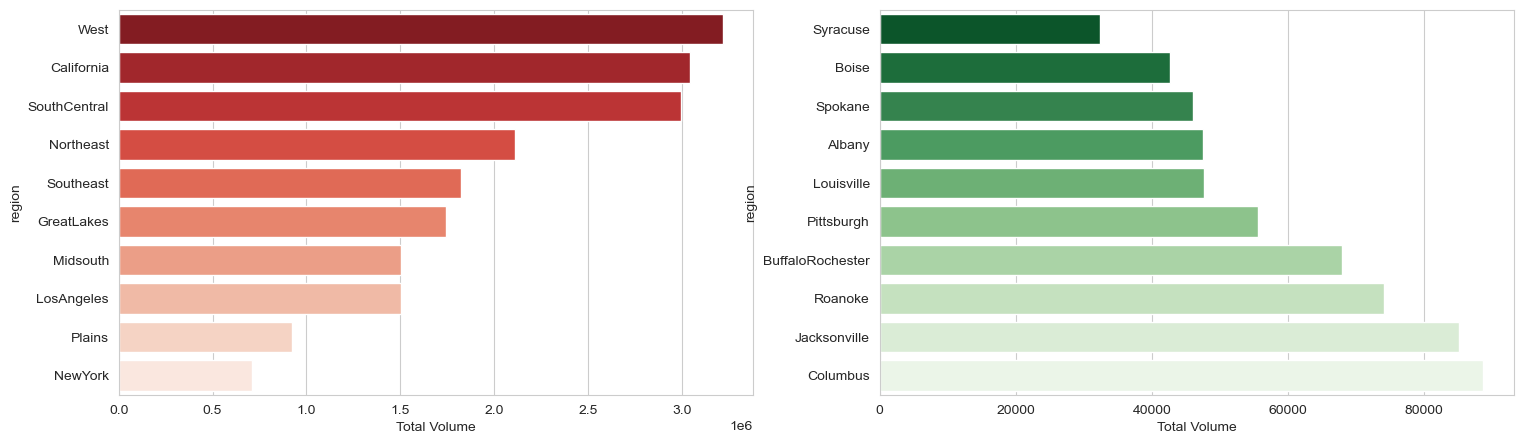

States with the the biggest demand are ['West', 'California', 'SouthCentral', 'Northeast', 'Southeast'] 
States with the least demand are ['Syracuse', 'Boise', 'Spokane', 'Albany', 'Louisville'] 


In [44]:
fig, ax = plt.subplots(1, 2, figsize=(18,5))

avoStates = avo[avo['region'] !='TotalUS']
regionV = avoStates.groupby('region')['Total Volume'].sum()
most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='Total Volume', y='region', data = avoStates, order=most.index, ci=None, palette='Reds_r', ax=ax[0])
sns.barplot(x='Total Volume', y='region', data = avoStates, order=least.index, ci=None, palette='Greens_r', ax=ax[1])
plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('States with the the biggest demand are {} '.format(list(most.iloc[:5,0])))
print('States with the least demand are {} '.format(list(least.iloc[:5,0])))

# Machine Learning

## import libraries for ML

In [45]:
# Machine Learning
from sklearn.model_selection import train_test_split

# Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor, plot_tree

np.warnings.filterwarnings('ignore')

# Classification

ทำนายประเภทของ Avocado ที่ทำการซื้อขาย

In [46]:
avo.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'month', 'day', 'Total Bags_scaled', 'AveragePrice_scaled',
       'year_month', 'quarter'],
      dtype='object')

In [47]:
# Data preparation
avo_features = avo.drop(['Date', 'region', 'Total Bags_scaled', 'AveragePrice_scaled', 'year_month'], axis=1)

target = avo_features['type']
features = avo_features.drop(['type'], axis=1)

In [48]:
avo_features.head(1)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month,day,quarter
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27,4


In [49]:
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

In [50]:
# Train set
print(X_train[:3])
print(y_train[:3])
print(X_train.shape)
print(y_train.shape)

[[1.04000000e+00 2.66719890e+05 5.37062000e+03 1.22058810e+05
  1.56740000e+03 1.37723060e+05 2.91233200e+04 1.08519740e+05
  8.00000000e+01 2.01600000e+03 9.00000000e+00 1.10000000e+01
  3.00000000e+00]
 [9.40000000e-01 4.69573721e+06 1.67660143e+06 1.54328076e+06
  2.66689820e+05 1.20916520e+06 1.06170358e+06 1.36747100e+05
  1.07145200e+04 2.01500000e+03 1.20000000e+01 2.00000000e+01
  4.00000000e+00]
 [2.83000000e+00 9.80189000e+03 6.63800000e+01 4.58579000e+03
  1.75490000e+02 4.97423000e+03 4.97090000e+03 3.33000000e+00
  0.00000000e+00 2.01700000e+03 8.00000000e+00 2.70000000e+01
  3.00000000e+00]]
['conventional' 'conventional' 'organic']
(13686, 13)
(13686,)


In [51]:
# Test set
print(X_test[:3])
print(y_test[:3])
print(X_test.shape)
print(y_test.shape)

[[1.48000000e+00 4.40025000e+03 1.35853000e+03 1.73598000e+03
  0.00000000e+00 1.30574000e+03 1.30000000e+02 1.17574000e+03
  0.00000000e+00 2.01500000e+03 1.20000000e+01 6.00000000e+00
  4.00000000e+00]
 [1.05000000e+00 1.90716430e+05 4.89033000e+03 1.19457270e+05
  1.34958600e+04 5.28729700e+04 3.06313700e+04 2.10375300e+04
  1.20407000e+03 2.01500000e+03 7.00000000e+00 5.00000000e+00
  3.00000000e+00]
 [1.27000000e+00 1.04545041e+06 1.05069070e+05 3.52698210e+05
  9.42564000e+03 5.78257490e+05 2.52881520e+05 3.25375970e+05
  0.00000000e+00 2.01600000e+03 3.00000000e+00 2.00000000e+01
  1.00000000e+00]]
['organic' 'conventional' 'organic']
(4563, 13)
(4563,)


## 1. Decision Tree

In [52]:
# create model
tree = DecisionTreeClassifier(max_depth=7, random_state=0)

In [53]:
# Train model

tree.fit(X_train, y_train)

print("training set score : {:.2f}".format(tree.score(X_train, y_train)))

training set score : 0.98


In [54]:
# Testing

pred = tree.predict(X_test)
print(pred)
print(pred.shape)

['organic' 'conventional' 'conventional' ... 'organic' 'organic' 'organic']
(4563,)


In [55]:
print("test set score: {:.2f}".format(tree.score(X_test, y_test)))

test set score: 0.97


In [56]:
print("feature importances:")
feature_importance = pd.DataFrame(features.keys(), tree.feature_importances_)
feature_importance = feature_importance.sort_index(ascending=False)
print(feature_importance)

feature importances:
                     0
0.760525  Total Volume
0.085976          4770
0.048882  AveragePrice
0.048301   XLarge Bags
0.015269    Large Bags
0.013354          4225
0.010553          4046
0.010419    Small Bags
0.002773    Total Bags
0.002524          year
0.000752           day
0.000671         month
0.000000       quarter


## 2. KNN

In [57]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
print("training set score : {:.2f}".format(knn.score(X_train, y_train)))
print("test set score: {:.2f}".format(knn.score(X_test, y_test)))

training set score : 0.97
test set score: 0.97


## 3. SVM

In [58]:
# Linear SVC

svc = LinearSVC(C=211)
svc.fit(X_train, y_train)
print("training set score : {:.2f}".format(svc.score(X_train, y_train)))
print("test set score: {:.2f}".format(svc.score(X_test, y_test)))

training set score : 0.92
test set score: 0.92


# Predict new data

In [59]:
# Trying new avos
new_avo = [1.58, 14000, 1176, 2321, 4778, 7438, 7000, 438, 0, 2018, 3, 5, 3]

In [60]:
new_avo = np.array(new_avo)
print(new_avo.shape)                # original shape


new_avo = new_avo.reshape(1,-1)
print(new_avo.shape)               # new shape

(13,)
(1, 13)


In [61]:
print(tree.predict(new_avo))
print(knn.predict(new_avo))
print(svc.predict(new_avo))

['organic']
['organic']
['organic']


# Regression

ทำนาย "AveragePrice (ราคา)" 

## 1. Decision Tree

In [62]:
avo.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,Total Bags_scaled,AveragePrice_scaled,year_month,quarter
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27,1.0,0.000153,2015-12,4
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20,1.0,0.000142,2015-12,4
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13,1.0,0.000114,2015-12,4
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6,1.0,0.000186,2015-12,4
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29,1.0,0.000207,2015-11,4


In [63]:
# Data preparation
avo_features = avo.drop(['Date', 'region', 'Total Bags_scaled', 'AveragePrice_scaled', 'year_month', 'type'], axis=1)

target = avo_features['AveragePrice']
features = avo_features.drop(['AveragePrice'], axis=1)

In [64]:
# Didvide train-test sets

X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

In [65]:
# Train, test and evaluate

TreeRegr = DecisionTreeRegressor(max_depth = 7, random_state = 42)  
TreeRegr.fit(X_train, y_train)

print("training set score : {:.2f}".format(TreeRegr.score(X_train, y_train)))
print("test set score: {:.2f}".format(TreeRegr.score(X_test, y_test)))

training set score : 0.65
test set score: 0.61


In [66]:
print("\n", "feature importances:")
feature_importance = pd.DataFrame(list(features.keys()), TreeRegr.feature_importances_)
print(feature_importance.sort_index(ascending=False))


 feature importances:
                     0
0.489797  Total Volume
0.121099          4046
0.090021    Large Bags
0.085500          year
0.059233         month
0.057894          4225
0.032178       quarter
0.026949    Small Bags
0.018946          4770
0.011197   XLarge Bags
0.007087    Total Bags
0.000097           day


## 2. Linear Models

In [67]:
# Default model

LinearRegr = LinearRegression().fit(X_train, y_train)

print('Linear Regression')
print("training set score : {:.2f}".format(LinearRegr.score(X_train, y_train)))
print("test set score: {:.2f}".format(LinearRegr.score(X_test, y_test)))

Linear Regression
training set score : 0.09
test set score: 0.10


### Optimization

In [68]:
# ------ Ridge
print(' \nRidge')
ridge = Ridge().fit(X_train, y_train)
print("training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# ------ Lasso
print(' \nLasso')
lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

# ------ Elastic Net
print(' \nElasticNet')
elastic = ElasticNet().fit(X_train, y_train)
print("training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))

 
Ridge
training set score : 0.09
test set score: 0.10
 
Lasso
training set score: 0.05
Test set score: 0.05
Number of features used: 8
 
ElasticNet
training set score: 0.05
Test set score: 0.05


### Normalisation

In [69]:
features

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,quarter
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,4
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,4
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,4
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,4
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


In [70]:
features.iloc[:,0:7] = np.log(features.iloc[:,0:7] + 1)

In [71]:
features

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,quarter
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,12,27,4
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,12,20,4
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,12,13,4
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,12,6,4
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,11,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,2018,2,4,1
18245,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,2018,1,28,1
18246,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,2018,1,21,1
18247,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,2018,1,14,1


In [72]:
# Linear Regression (default)
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

LinearRegr = LinearRegression().fit(X_train, y_train)
print('Linear Regression')
print("training set score : {:.2f}".format(LinearRegr.score(X_train, y_train)))
print("test set score: {:.2f}".format(LinearRegr.score(X_test, y_test)))

# ------ Ridge
print(' \nRidge')
ridge = Ridge().fit(X_train, y_train)
print("training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# ------ Lasso
print(' \nLasso')
lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

# ------ Elastic Net
print(' \nElasticNet')
elastic = ElasticNet().fit(X_train, y_train)
print("training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))

Linear Regression
training set score : 0.49
test set score: 0.49
 
Ridge
training set score : 0.49
test set score: 0.49
 
Lasso
training set score: 0.01
Test set score: 0.01
Number of features used: 1
 
ElasticNet
training set score: 0.19
Test set score: 0.18


### Dummy variables

In [73]:
# Data preparation
avo_features = avo.drop(['Date', 'Total Bags_scaled', 'AveragePrice_scaled', 'year_month'], axis=1)
avo_features = pd.get_dummies(avo_features)

target = avo_features['AveragePrice']
features = avo_features.drop(['AveragePrice'], axis=1)

In [74]:
features.iloc[:,0:7] = np.log(features.iloc[:,0:7] +1)

X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, random_state=0)

In [75]:
# ------ Ridge
print(' \nRidge')
ridge = Ridge().fit(X_train, y_train)
print("training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test, y_test)))

# ------ Lasso
print(' \nLasso')
lasso = Lasso().fit(X_train, y_train)
print("training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

# ------ Elastic Net
print(' \nElasticNet')
elastic = ElasticNet().fit(X_train, y_train)
print("training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))

 
Ridge
training set score : 0.72
test set score: 0.71
 
Lasso
training set score: 0.01
Test set score: 0.01
Number of features used: 1
 
ElasticNet
training set score: 0.19
Test set score: 0.18
